Cell 1: Imports & Style

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

# Общий стиль и палитра
sns.set_theme(
    style="whitegrid",       # 'whitegrid', 'darkgrid', 'ticks'
    palette="flare",         # тёплая палитра для категорий
    rc={                     # rc-параметры matplotlib
        "figure.figsize": (6, 4),
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10
    }
)

Cell 2: Load Preprocessed Data

In [9]:
df = pd.read_csv('../data/processed/heart_preprocessed.csv')
print("Размер данных:", df.shape)
df.head()

Размер данных: (302, 23)


,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


Cell 3: Helper Functions for EDA

In [11]:
def plot_histograms(data: pd.DataFrame, columns: List[str], bins: int = 30) -> None:
    """Гистограммы по списку колонок."""
    for col in columns:
        plt.figure()
        data[col].hist(bins=bins)
        plt.title(f'Распределение {col}')
        plt.xlabel(col)
        plt.ylabel('Частота')
        plt.show()

def plot_boxplots(data: pd.DataFrame, columns: List[str]) -> None:
    """Горизонтальные box-plot по списку колонок."""
    for col in columns:
        plt.figure()
        plt.boxplot(data[col], vert=False)
        plt.title(f'Box-plot для {col}')
        plt.xlabel(col)
        plt.show()

Cell 4: Run EDA

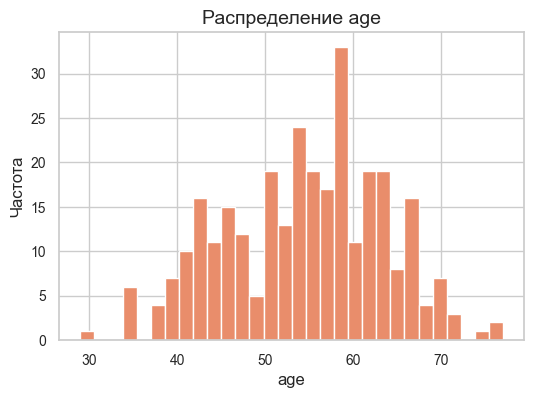

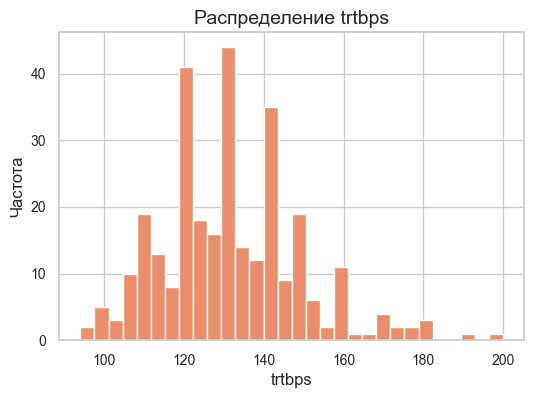

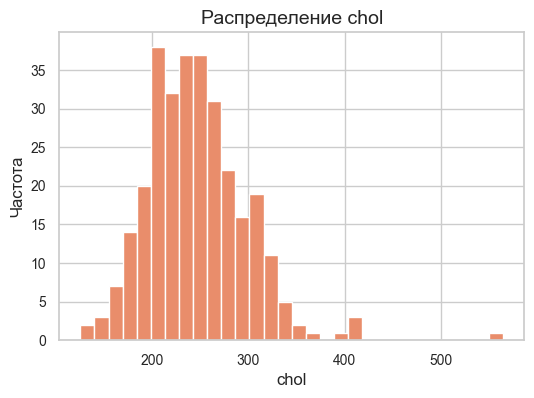

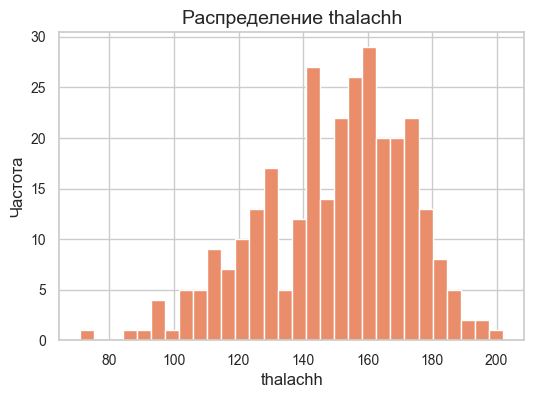

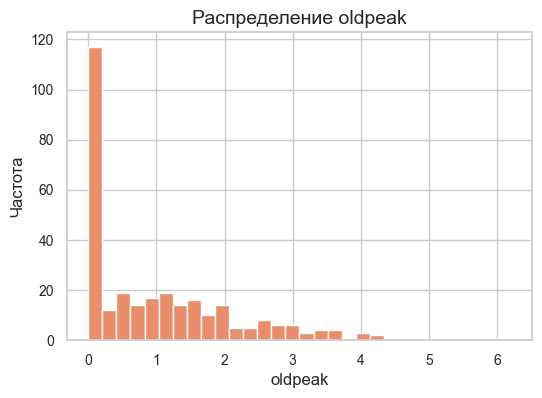

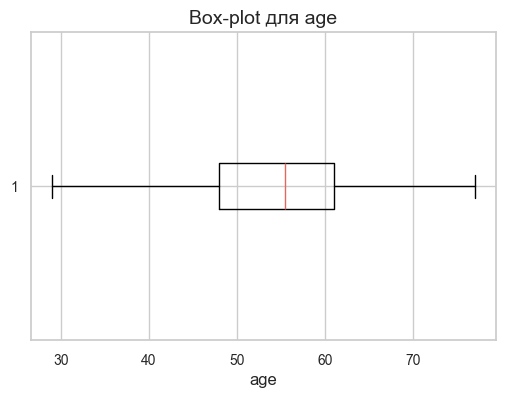

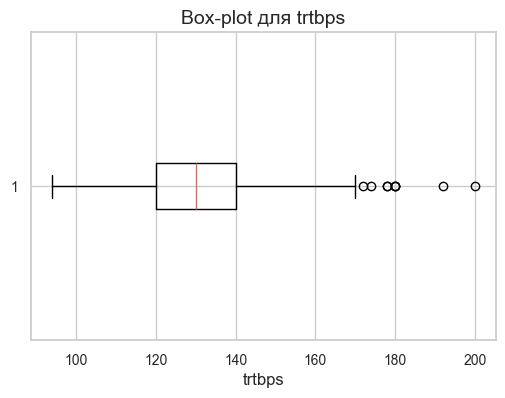

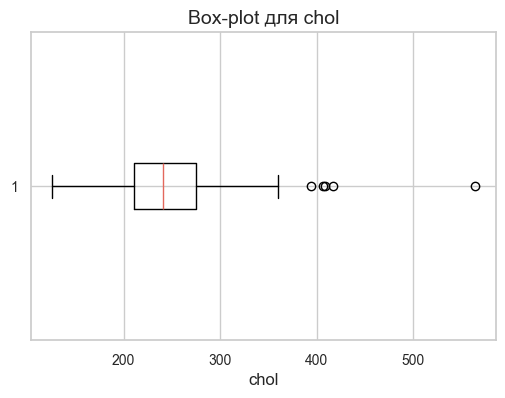

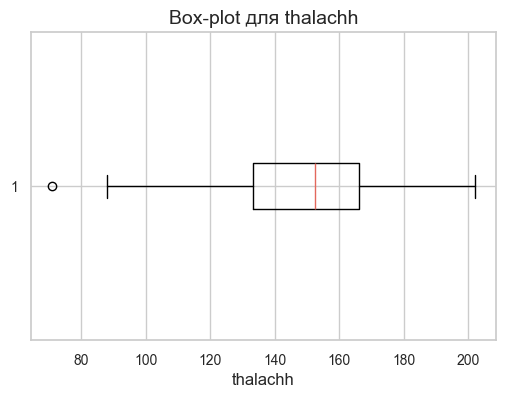

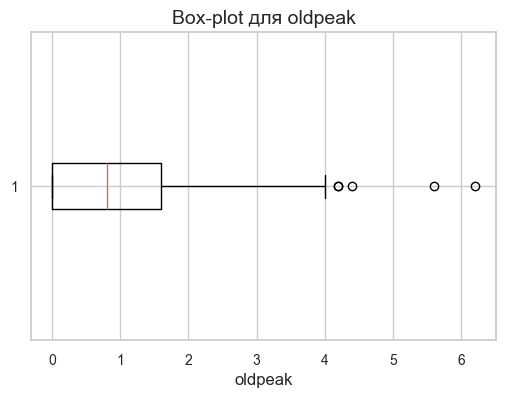

In [12]:
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plot_histograms(df, num_cols)
plot_boxplots(df, num_cols)

## Выводы по EDA (гистограммы и boxplots)

### 1. Возраст (age)
- **Распределение**: пациенты от ~30 до ~80 лет, пик вокруг 55–60 лет.  
- **Скошенность**: лёгкий правый хвост (несколько пожилых >70).  
- **Выбросы**: отсутствуют («усы» охватывают весь диапазон без точечных отметок).

### 2. Артериальное давление в покое (trtbps)
- **Распределение**: большинство значений в диапазоне 110–150 мм рт. ст.  
- **Скошенность**: небольшое смещение вправо, есть редкие случаи >170.  
- **Выбросы**: несколько точек в области 170–200, но они физически допустимы и могут остаться для моделирования.

### 3. Холестерин (chol)
- **Распределение**: основная масса в 180–300 mg/dl.  
- **Скошенность**: правый хвост до 400–500, встречаются редкие пациенты с очень высоким уровнем.  
- **Выбросы**: несколько точечных значений >350, можно оставить (важная клиническая информация).

### 4. Максимальная частота сердечных сокращений (thalachh)
- **Распределение**: нормальное с пиком около 140–170 уд/мин.  
- **Скошенность**: лёгкая влево из-за редких низких значений (~80).  
- **Выбросы**: единичный «низкий» выброс около 80, но он в рамках физиологии.

### 5. Oldpeak (депрессия ST-сегмента)
- **Распределение**: подавляющее большинство значений в 0–2;  
- **Хвост**: значения до 4–6, редкие случаи сильной депрессии.  
- **Выбросы**: несколько точек >4, отражают выраженную депрессию ST, оставить для анализа риска.

---

**Общий вывод**  
- Все числовые признаки имеют разумные диапазоны и лишь несколько крайних значений, которые могут быть клинически значимыми, а не ошибками.  
- Грубой очистки (удаления выбросов) не требуется — модели могут извлечь дополнительную информацию из редких, но важных экстремумов.  
- Данные готовы к корреляционному анализу и построению предиктивных моделей.
